#Assignment 1: Logistic Regression

## Dataset load & Plot

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

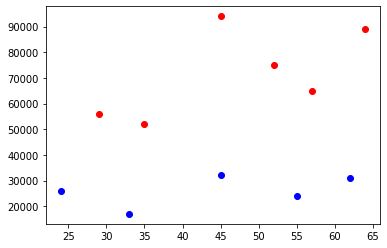

In [ ]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
label_mask = np.equal(y, 1)

plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')
plt.show()

# Problem 1-1. Logistic regression model using sklearn packages.

Train your data using LogisticRegression classes from skikit-learn library.


In [ ]:
def learn_and_return_weights(X,y):

    from sklearn.linear_model import LogisticRegression
    #w:coefficient of the model to input features,
    #b:bias of the model

    #모델 정의
    model=LogisticRegression()
    
    #모델 fit
    model.fit(X,y)

    #w(slop) 초기화
    w=model.coef_[0]

    #b(y-intercept) 초기화
    b=model.intercept_[0]

    return w,b

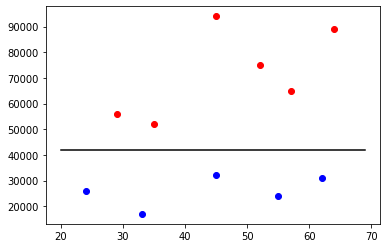

In [ ]:
def plot_data_and_weights(X, y, w, b):
    plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
    plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

    x_lin = np.arange(20, 70)
    y_lin = -(0.5 + b + w[0] * x_lin) / w[1]

    plt.plot(x_lin, y_lin, color='black');
    plt.show()

w, b = learn_and_return_weights(X, y)
plot_data_and_weights(X, y, w, b)

## Problem 1-2. Implement Logistic Regression Model

Implement Logistic Regression without using scikit-learn libraries.


In [ ]:
import numpy as np

#sigmoid 함수
def sigmoid(z):
  return 1 / (1 +np.exp(-z))
     

#입력된 데이터를 1 혹은 0 둘 중 하나로 분류
def binary_cross_entropy_loss(y_pred, target):
    pred=sigmoid(y_pred.linear(target))
    
    if pred>=0.5:
      return 1
    else:
      return 0


def learn_and_return_weights_numpy(X, Y, lr=0.01, iter=100000):

    np.random.seed(0)

    #W, b 값 초기화
    W=np.random.uniform(0,1,size=(X.shape[1]))
    b=0.5
    size=X.shape[0]


    for i in range(iter):
      sigma=sigmoid(np.dot(X,W)+b)  
      loss=-1/size*np.sum(y*np.log(sigma))+(1-y)*np.log(1-sigma) #손실값 계산
      grad_W=1/size*np.dot(X.T,(sigma-Y)) #w에 대한 행렬곱
      grad_b=1/size*np.sum(sigma-Y) #b에 대한 손실의 기울기

      #W, b값 갱신
      W-=lr*grad_W
      b-=lr*grad_b

    return W, b

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.496294155381136
[-2.05375617e+03  1.89636624e+00] -48.49629415

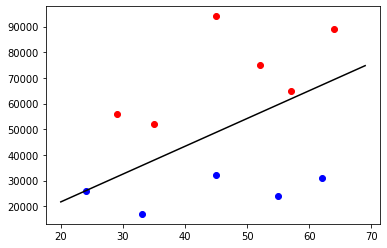

In [9]:
w, b = learn_and_return_weights_numpy(X, y)
plot_data_and_weights(X, y, w, b)